<a href="https://colab.research.google.com/github/osamuelmarlon/airbnb_oligopolio/blob/main/Analise_Dados_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Samuel Costa](https://www.linkedin.com/in/samuel-marlon-lopes-costa/)*

---

# Análise dos Dados do Airbnb - *Barcelona*

#Airbnb: Da Economia Colaborativa ao Oligopólio-o que os dados revelam sobre a crise da moradia em Barcelona

O Airbnb foi fundado com a promessa da economia colaborativa: conectar viajantes e anfitriões que buscavam apenas uma renda extra. Hoje, é a maior empresa hoteleira da atualidade, apesar de não possuir nenhum hotel.
A plataforma tem alterado a dinâmica interna de cidades do mundo inteiro, e a população tem sofrido com os efeitos da gentrificação e turistificação.


Aumento do custo de moradia, sobrecarga nas infraestruturas urbanas, expulsão da população mais pobre dos centros, homogeneização do comércio e da cena cultural para atender prioritariamente aos turistas são alguns dos problemas gerados.

Não à toa, em 2024, a prefeitura de Barcelona elaborou um plano para encerrar todos os aluguéis de curta temporada até 2028 e o ministro dos direitos do consumidor, Pablo Bustinduy, já disse que "se uma casa não tem licença para turismo, anunciá-la em plataformas de internet deveria ser ilegal e, portanto, punido".

Para entender quem realmente está por trás desse mercado, recorri à literatura. O que a academia chama de "financeirização da moradia" sugere que o Airbnb não é mais um negócio de pessoas comuns, mas sim de operadores profissionais.

A análise busca validar a premissa estabelecida em diversos estudos: que anfitriões com mais de um anúncio atuam majoritariamente como profissionais, distinguindo-se claramente daqueles que buscam apenas uma fonte eventual de renda.

Meu objetivo é analisar os dados brutos de Barcelona para ir além da narrativa corporativa e mapear essa profissionalização, conectando as descobertas com a crise habitacional e as medidas regulatórias que estão em curso.



## 🎯 Objetivos da Análise Exploratória (EDA)

Nossa análise será conduzida com três objetivos principais, focando na diferenciação dos perfis de anfitriões e suas práticas de compliance:

* Validar a Profissionalização (De Host a Operador): Confirmar a hipótese de que usuários com mais de um anúncio pode ser considerado profissional e não um anfitrião comum querendo uma renda extra.

* Analisar Compliance e Evasão Regulatória: Investigar o papel da licença como indicador de compliance. A ausência de licença pode indicar anunciantes que se eximem de cumprir obrigações regulatórias e tributárias.

* Mapear e Comparar os Perfis de Oferta: Detalhar e contrastar as diferentes características dos três grupos centrais na nossa base de dados:

  * Anfitriões Comuns: Um único anúncio.
  * Anfitriões Profissionais: Mais de um anúncio.
  * Super Hosts/Grandes Operadores: O grupo dos 30 maiores anunciantes (que nesta base de dados possuem entre 49 e 522 anúncios).

**Dados referentes a 12/06/2025.**

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

Os dados são referentes à base de 12 Junho de 2025.

In [2]:
# importar o arquivo listings.csv para um DataFrame
csv_url = 'https://drive.google.com/uc?export=download&id=1ogc1J7V7c2NQfT36Bszm30uohFQFBIdf'
df = pd.read_csv(csv_url)

## Análise dos Dados


**Dicionário das variáveis**

* id - ID do anúncio
* name - Nome do anúncio
* host_id - ID do proprietário do anúncio
* host_name - Nome do proprietário do anúncio
*	neighbourhood_group -
*	neighbourhood - Nome do bairro
*	latitude - Latitude
*	longitude - Longitude
*	room_type - Tipo da propriedade/quarto anunciada(o)
*	price - Preço da diária
*	minimum_nights - Quantidade mínima de noites aceitas para reserva
*	number_of_reviews - Quantidade de reviews
*	last_review - Data do último review
*	reviews_per_month - Quantidade de reviews por mês
*	calculated_host_listings_count - Quantidade de imóveis do proprietário
*	availability_365 - Quantidade de dias disponíveis por ano
*	number_of_reviews_ltm - Quantidade de reviews nos últimos 12 meses
*	license - Código de licença

In [3]:
# mostra as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,232.0,1,48,2025-06-11,0.33,28,65,6,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,382.0,3,88,2025-05-31,0.51,1,174,10,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,186.0,1,147,2025-05-14,0.87,3,39,26,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,131.0,31,25,2024-11-05,0.14,3,333,9,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,449.0,5,267,2025-06-17,1.49,3,315,31,ESFCTU000008119000093652000000000000000HUTB-00...


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# Volume de dados do DataFrame
df.shape

(18927, 18)

In [5]:
# verificar a quantidade de entradas e os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18927 non-null  int64  
 1   name                            18927 non-null  object 
 2   host_id                         18927 non-null  int64  
 3   host_name                       18924 non-null  object 
 4   neighbourhood_group             18927 non-null  object 
 5   neighbourhood                   18927 non-null  object 
 6   latitude                        18927 non-null  float64
 7   longitude                       18927 non-null  float64
 8   room_type                       18927 non-null  object 
 9   price                           14913 non-null  float64
 10  minimum_nights                  18927 non-null  int64  
 11  number_of_reviews               18927 non-null  int64  
 12  last_review                     

### **Porcentagem de valores ausentes no dataset**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

,0
license,33.439002
reviews_per_month,26.406721
last_review,26.406721
price,21.207798
host_name,0.015850
id,0.000000
name,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


### **Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

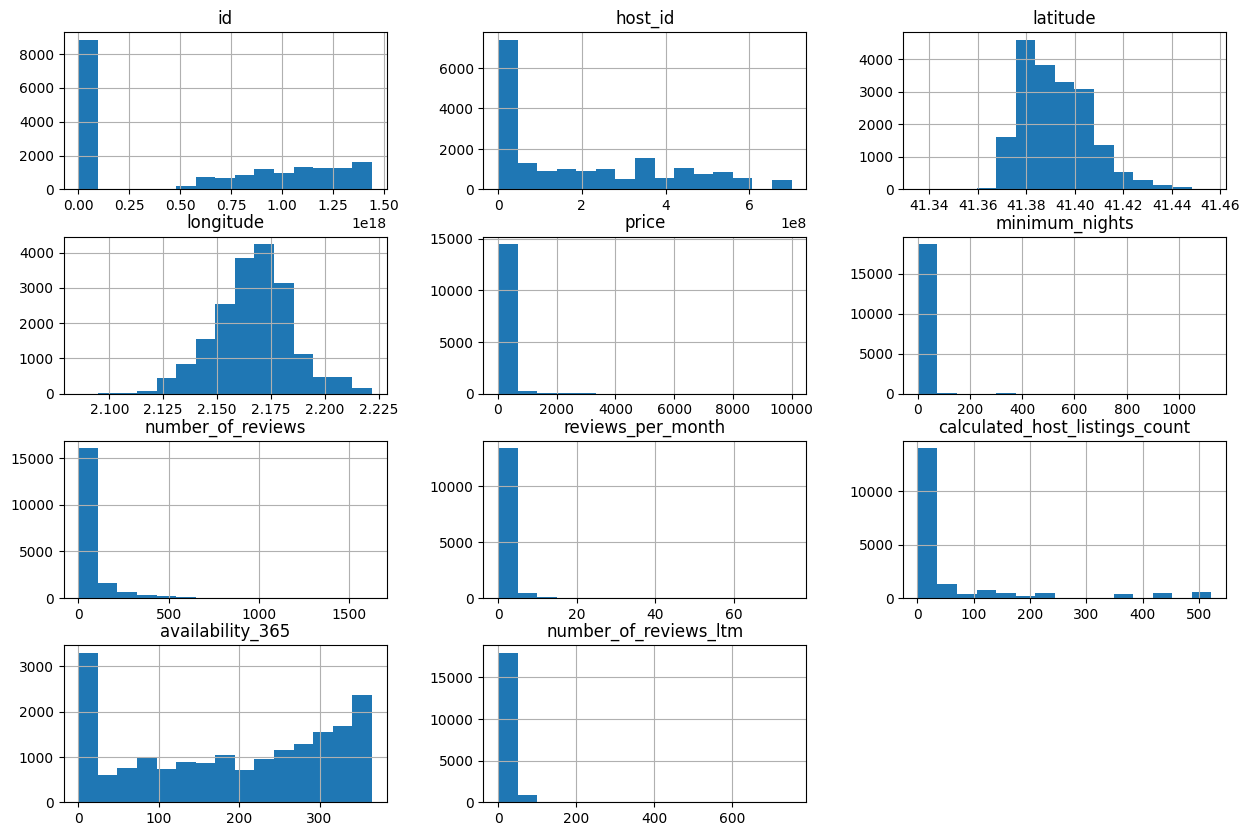

In [7]:
df.hist(bins=15, figsize=(15,10))

### **Qual a média dos preços de aluguel?**

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14913.000000,18927.000000,18927.000000,13929.000000,18927.000000,18927.000000
mean,214.380071,16.428700,51.420880,1.454379,58.118402,189.396629
std,385.402591,29.671949,105.225157,2.117481,118.410875,125.983317
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,74.000000,1.000000,0.000000,0.190000,2.000000,75.000000
50%,143.000000,3.000000,6.000000,0.750000,7.000000,204.000000
75%,256.000000,31.000000,53.000000,2.180000,39.000000,305.000000
max,10000.000000,1124.000000,1624.000000,74.790000,522.000000,365.000000


## **Identificando possíveis outliers**

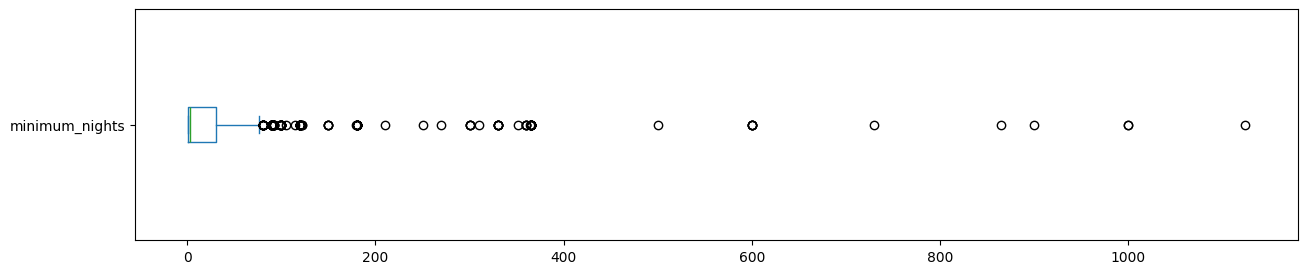

minimum_nights: valores acima de 60:
214 entradas
1.1307%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 60:")
print("{} entradas".format(len(df[df.minimum_nights > 60])))
print("{:.4f}%".format((len(df[df.minimum_nights > 60]) / df.shape[0])*100))

Barcelona tem uma quantidade muito grande de anúncios que exigem no mínimo até 60 noites para a reserva. Mais um indício de que a prática profissional da plataforma é muito difundida.

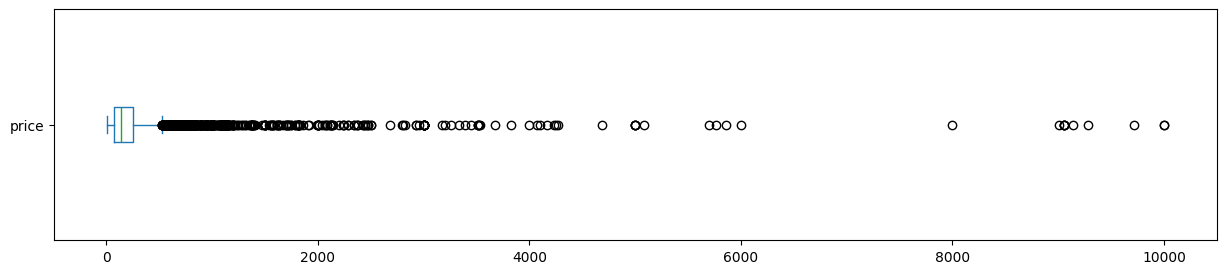

price: valores acima de $1100:
204 entradas
1.0778%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de $1100 para price
print("price: valores acima de $1100:")
print("{} entradas".format(len(df[df.price > 1100])))
print("{:.4f}%".format((len(df[df.price > 1100]) / df.shape[0])*100))

# **Retirando outliers do dataframe**
Decidi retirar os outliers da variável `price` e `minimum_nights`


*   `price`: Preços acima de $1100 (representa 1%)
*   `minimum_nights`: Quantidade maior do que 60 (representa 1%)





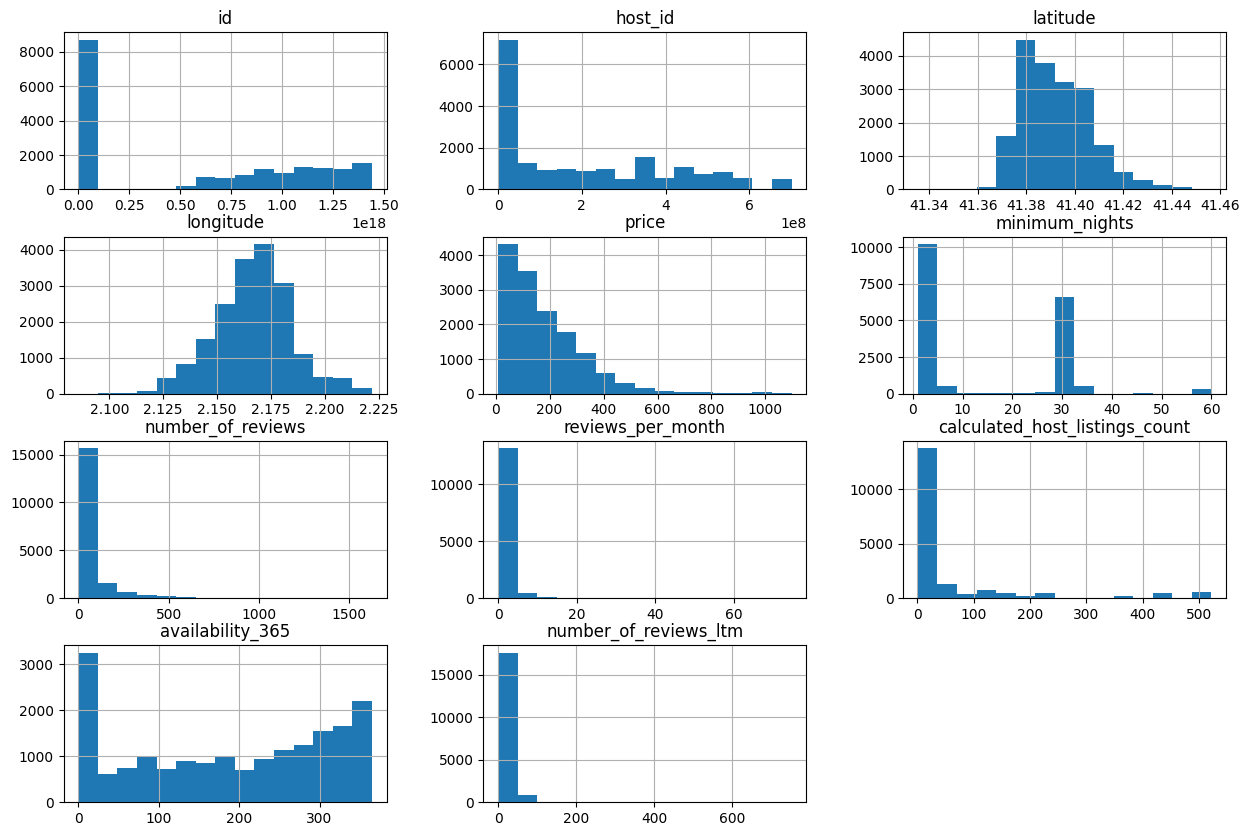

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **Bairros com maior quantidade de anúncios**

In [12]:
df_clean.neighbourhood.value_counts(ascending=False)[:10]

,count
neighbourhood,
la Dreta de l'Eixample,2245
el Raval,1428
"Sant Pere, Santa Caterina i la Ribera",1182
el Barri Gòtic,1153
la Vila de Gràcia,1083
la Sagrada Família,1046
l'Antiga Esquerra de l'Eixample,1035
Sant Antoni,933
el Poble Sec,835


## **Bairros com as maiores médias de preço**

In [13]:
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Diagonal Mar i el Front Marítim del Poblenou,271.481203
la Dreta de l'Eixample,265.213398
la Vila Olímpica del Poblenou,259.708955
Sant Antoni,216.194517
l'Antiga Esquerra de l'Eixample,209.358580
la Clota,209.000000
la Sagrada Família,205.093787
la Nova Esquerra de l'Eixample,203.871186
el Fort Pienc,202.410667


# **Características dos hosts profissionais e dos colaborativos**

Como  foi feita a retirada de outliers, a coluna `calculated_host_listings_count` deixa de ser uma boa referência para classificar entre hosts colaborativos, profissionais e super hosts. Essa categorização deve ser feita apenas usando a frequência do host_id.

Para facilitar, usaremos as máscaras abaixo:

In [14]:
# Máscara: linhas cujo host_id aparece exatamente 1 vez no df_clean
mask_comum = df_clean.groupby('host_id')['host_id'].transform('size') == 1

# Top 30 hosts por número de anúncios
top_30_hosts = df_clean['host_id'].value_counts().nlargest(30).index
mask_superhost = df_clean['host_id'].isin(top_30_hosts)

# Profissionais = quem NÃO é superhost e NÃO é comum (logo, tem 2+ anúncios fora do top30)
mask_profissional = (~mask_superhost) & (~mask_comum)

Criando um novo daframe com a coluna para categoria do host

In [15]:
# Partindo das masks já definidas e mutuamente exclusivas:
# mask_superhost, mask_comum, mask_profissional

df_cat = df_clean.copy()
df_cat['categoria_host'] = 'outros'

df_cat.loc[mask_comum, 'categoria_host'] = 'comum'
df_cat.loc[mask_profissional, 'categoria_host'] = 'profissional'
df_cat.loc[mask_superhost, 'categoria_host'] = 'super_host'

## Nome dos 30 maiores anunciantes

In [30]:
superhosts_df = df_cat[df_cat['categoria_host'] == 'super_host']

superhost_listings_count = superhosts_df.groupby('host_name').size().sort_values(ascending=False)

print(superhost_listings_count)

host_name
Ukio                      520
Enter                     423
Alvaro                    237
SweetInn                  226
Acomodis Apartments       225
AB Apartment Barcelona    202
Blueground                162
BeBarceloner              161
Stay U-Nique              157
Arnau                     139
David                     137
Room Housing              136
Silvia                    124
Habitat Apartments        123
Joaquín                   106
Alcam Apartments           84
Loca Bcn                   79
Alejandro                  78
Laia                       74
Ezequiel                   73
Home Club                  70
Ola                        68
Suzy                       65
Alba                       64
Eva                        58
Maria Azucena              57
HiGuests                   56
BeAndLiveHomes             53
Ale, Maria & Arthur        52
Alexandre                  48
dtype: int64


## **Proporção de anúncios por categoria de host**

In [16]:
total_anuncios = len(df_cat)  # total de linhas (anúncios)

prop_cat = df_cat.groupby('categoria_host').agg(
    n_hosts=('host_id', 'nunique'),
    n_anuncios=('host_id', 'size')
)
prop_cat['prop_anuncios'] = prop_cat['n_anuncios'] / total_anuncios

display(prop_cat.style.format({'prop_anuncios': '{:.0%}'}))

,n_hosts,n_anuncios,prop_anuncios
categoria_host,,,
comum,4579,4579,25%
profissional,1917,9873,53%
super_host,30,4057,22%


**75%** dos anúncios são de **hosts profissionais**.


Os Super Hosts, composto por 30 usuários (0,5%), detém 22% dos anúncios de Barcelona.
Os hosts comuns, que são a maioria (70% dos usuários), possuem 25% dos anúncios.

Esses dados revelam que há uma espécie de oligopólio nos anúnios no Airbnb de Barcelona, desviando completamente da ideia de economia colaborativa.

## **Média de noites mínimas permitidas para reserva por categoria**

In [17]:
df_cat.groupby('categoria_host')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
categoria_host,,,,,,,,
comum,4579.0,13.498799,14.628864,1.0,2.0,3.0,31.0,60.0
profissional,9873.0,12.223944,14.413450,1.0,1.0,3.0,31.0,60.0
super_host,4057.0,22.282721,17.112292,1.0,2.0,31.0,32.0,60.0


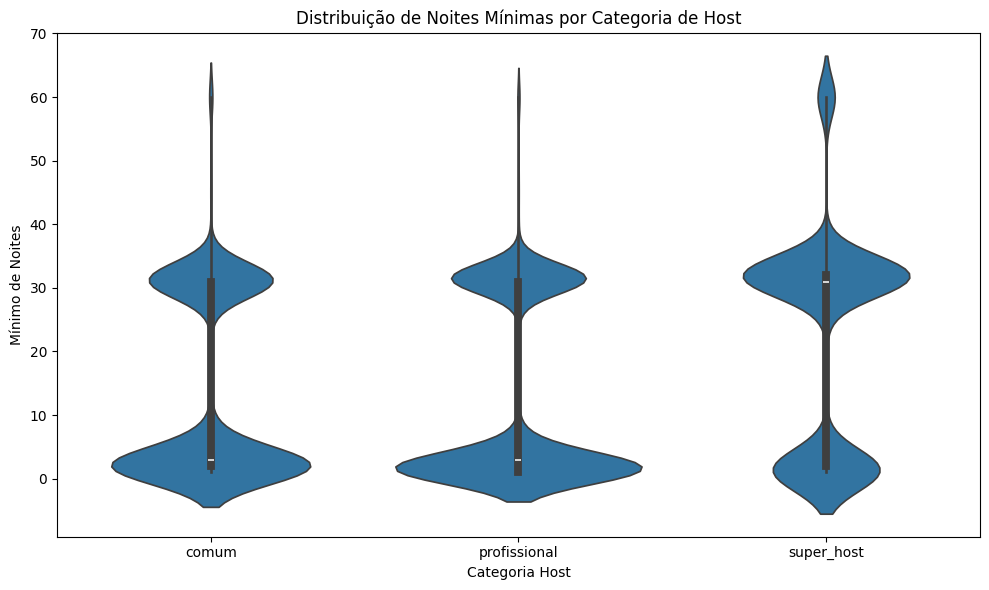

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cat, x='categoria_host', y='minimum_nights', order=['comum', 'profissional', 'super_host'])
plt.title('Distribuição de Noites Mínimas por Categoria de Host')
plt.xlabel('Categoria Host')
plt.ylabel('Mínimo de Noites')
plt.tight_layout()
plt.show()

## **Proporção de anúncios sem licença em cada categoria de host**


In [19]:
anuncio_sem_licenca = df_cat.groupby('categoria_host').agg(
    anuncios=('license', 'size'),
    sem_licenca=('license', lambda s: s.isna().sum())
)
anuncio_sem_licenca['prop_sem_licenca'] = anuncio_sem_licenca['sem_licenca'] / anuncio_sem_licenca['anuncios']

# Exibir formatado, mas mantendo valores numéricos internamente
display(anuncio_sem_licenca.style.format({'prop_sem_licenca': '{:.0%}'}))

,anuncios,sem_licenca,prop_sem_licenca
categoria_host,,,
comum,4579,1958,43%
profissional,9873,2068,21%
super_host,4057,2152,53%


O Super Hosts possuem a maior porcentagem de anúncios sem licença (53%). Ou seja, os anunciantes com as maiores quantidades de imóveis e que mais lucram com a plataforma, são os que mais se isentam de cumprir com as obrigações regulamentárias e tributárias de Barcelona.

Dado alarmante, principalmente na cidade com a legislação mais rigorosa atualmente.

## **Preço médio e bairro mais frequente por tipo de host**

In [20]:
# Contagem e preço médio de anúncios por categoria e bairro
contagens = (
    df_cat
      .groupby(['categoria_host', 'neighbourhood'])
      .agg(
          anuncios=('host_id', 'size'),
          preco_medio=('price', 'mean')
      )
      .reset_index()
)

# Total de anúncios por categoria
totais_cat = contagens.groupby('categoria_host')['anuncios'].sum().rename('total_categoria')

# Junta os totais e calcula a porcentagem dentro da categoria
contagens = contagens.merge(totais_cat, on='categoria_host')
contagens['perc_categoria'] = contagens['anuncios'] / contagens['total_categoria']

# Ordena e pega os 3 bairros mais frequentes de cada categoria
top3_bairros_pct = (
    contagens
      .sort_values(['categoria_host', 'anuncios'], ascending=[True, False])
      .groupby('categoria_host')
      .head(3)
      .reset_index(drop=True)
)

# Cria coluna combinando nº de anúncios e %
resultado = top3_bairros_pct.assign(
    anuncios_e_pct=top3_bairros_pct.apply(
        lambda r: f"{r['anuncios']} ({r['perc_categoria']:.1%})", axis=1
    )
)[['categoria_host', 'neighbourhood', 'preco_medio', 'anuncios_e_pct']]

# Formata o preço médio com 2 casas decimais
resultado['preco_medio'] = resultado['preco_medio'].round(2)

display(resultado)

,categoria_host,neighbourhood,preco_medio,anuncios_e_pct
0,comum,el Raval,108.69,381 (8.3%)
1,comum,"Sant Pere, Santa Caterina i la Ribera",128.94,295 (6.4%)
2,comum,el Poble Sec,141.21,271 (5.9%)
3,profissional,la Dreta de l'Eixample,285.21,1416 (14.3%)
4,profissional,el Raval,150.73,850 (8.6%)
5,profissional,el Barri Gòtic,163.97,682 (6.9%)
6,super_host,la Dreta de l'Eixample,226.94,559 (13.8%)
7,super_host,l'Antiga Esquerra de l'Eixample,169.64,314 (7.7%)
8,super_host,Sant Antoni,252.13,278 (6.9%)


####**Localização**
O bairro mais comum para hosts **não profissionais** é o *El Raval*, bairro  historicamente considerado relativamente barato em Barcelona, com uma população de renda mais baixa e predominantemente imigrante.

Nas categorias **profissional e super host**, o bairro é o mesmo, *la Dreta de l'Eixample*, conhecido por sua sofisticação e por atrair moradores de renda mais alta, muito **próximo à Basílica da Sagrada Família** e onde está a Casa Milà, edifício desenhado por **Gaudí**.

Além disso, na categoria Super Host, os três bairros mais frequentes estão no top 5 de bairros mais caros de Barcelona.

O bairro mais frequente nos anúncios de cada categoria reforça a hipótese de que hosts com mais de um anúncio são usuários profissionais e usam a plataforma para **lucrar**, e possuem anúncios nas regiões mais caras e turísticas, diferente dos hosts comuns que ainda usam de forma **colaborativa**, para ter uma renda extra, esporádica.

####**Preço**
O preço médio do bairro mais frequente de cada categoria também é sintomático.

A média de preço do bairro mais frequente na categoria comum (*el Raval*) é 62% menor do que no bairro mais frequente da categoria profissional (*la Dreta de l'Eixample*).


/tmp/ipython-input-4100399883.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot, x='categoria_host', y='price',


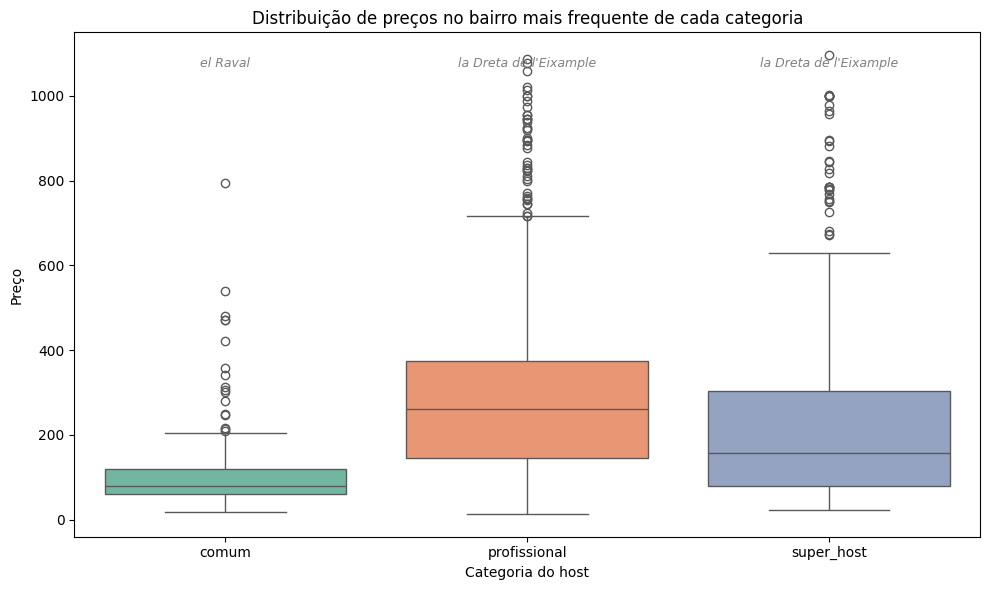

In [21]:
# Pegar o bairro mais frequente de cada categoria (rank 1)
bairro_top1 = (
    contagens
      .sort_values(['categoria_host', 'anuncios'], ascending=[True, False])
      .groupby('categoria_host')
      .first()
      .reset_index()
      [['categoria_host', 'neighbourhood']]
)

# Filtrar df_cat para ter apenas os anúncios desses bairros top1 por categoria
df_boxplot = df_cat.merge(
    bairro_top1.assign(is_top1=True),
    on=['categoria_host', 'neighbourhood'],
    how='inner'
)

# Ordem das categorias
ordem = ['comum', 'profissional', 'super_host']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot, x='categoria_host', y='price',
            order=ordem, palette='Set2')
plt.ylabel('Preço')
plt.xlabel('Categoria do host')
plt.title('Distribuição de preços no bairro mais frequente de cada categoria')

# Adicionar o nome do bairro como subtítulo em cada categoria
for i, cat in enumerate(ordem):
    bairro = bairro_top1[bairro_top1['categoria_host'] == cat]['neighbourhood'].values[0]
    plt.text(i, plt.ylim()[1]*0.95, bairro, ha='center', va='top',
             fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.show()

## **Tipo de quarto/imóvel anunciado por categoria**

In [22]:
prop_room_type = (df_cat.groupby('categoria_host')['room_type'].value_counts(normalize=True).unstack(fill_value=0))

display(prop_room_type.style.format('{:.0%}'))

room_type,Entire home/apt,Hotel room,Private room,Shared room
categoria_host,,,,
comum,44%,0%,56%,0%
profissional,66%,1%,33%,1%
super_host,70%,0%,30%,0%


Os hosts comuns anunciam majoritariamente quartos privativos (56%).


Hosts Profissionais anunciam majoritariamente casas e apartamentos inteiros (66%)


E os Super Hosts aumentam ainda mais a disparidade, e anunciam casas e apartamentos inteiros em 70% dos anúncios.

Esse resultado confirma a tese de que anunciar casas e apartamentos inteiros é umas das características de hosts profissionais.

E exatamente por ser uma característica desse grupo e por eles concentrarem a maior parte dos anúncios, os problemas de moradia se intensificam, já que casas inteiras servem apenas para hospedar turistas e não a população local, reduzindo a capacidade da cidade de alocar um grande contigente de pessoas nos centros e haver a expulsão principalmente das classes mais baixas.

### **Qual a correlação existente entre as variáveis**

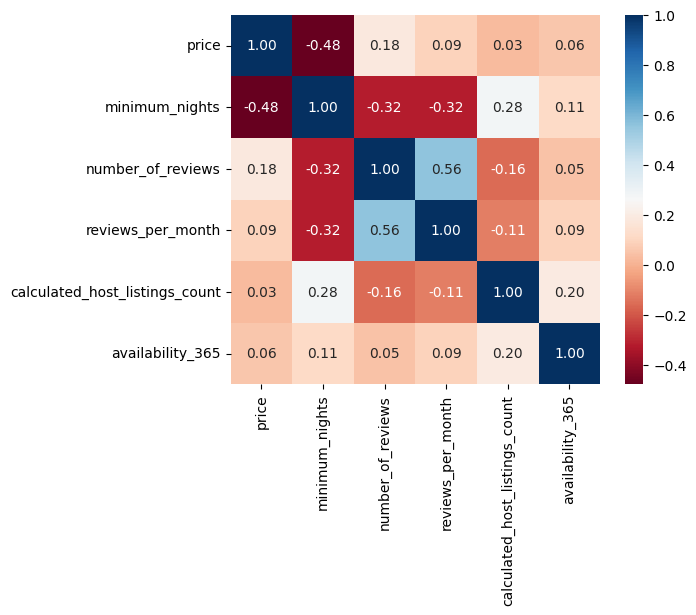

In [24]:
# criar uma matriz de correlação
corr = df_cat[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Não há correlação relevante e significativa para o objeto da presente análise

In [25]:
df_cat_comum = df_cat[df_cat['categoria_host'] == 'comum']
df_cat_profissional = df_cat[df_cat['categoria_host'] == 'profissional']
df_cat_superhost = df_cat[df_cat['categoria_host'] == 'super_host']

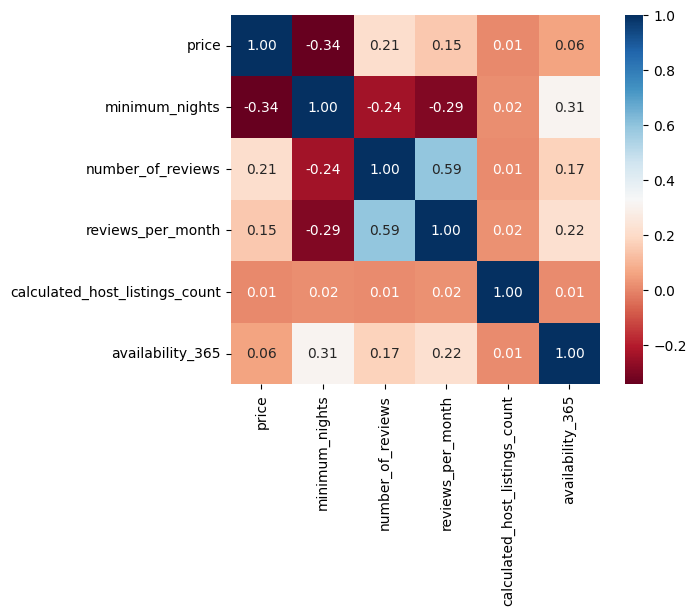

In [26]:
#Comum
corr_comum = df_cat_comum[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr_comum, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

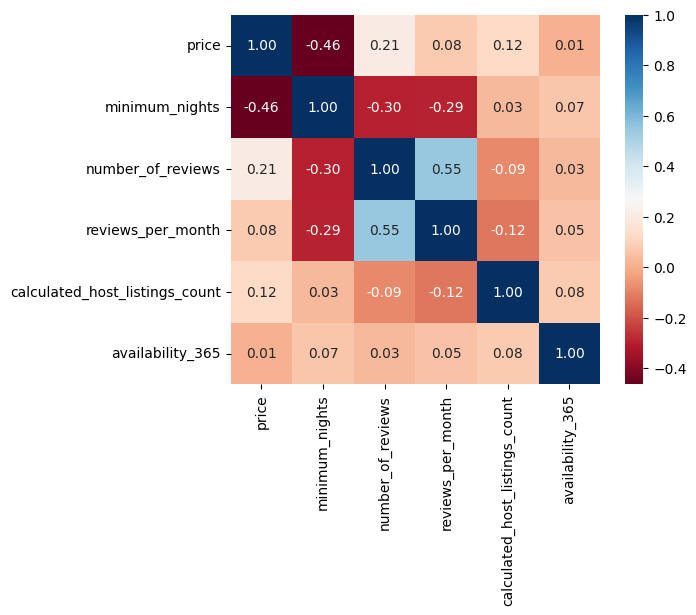

In [27]:
#Profissional
corr_profissional = df_cat_profissional[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr_profissional, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

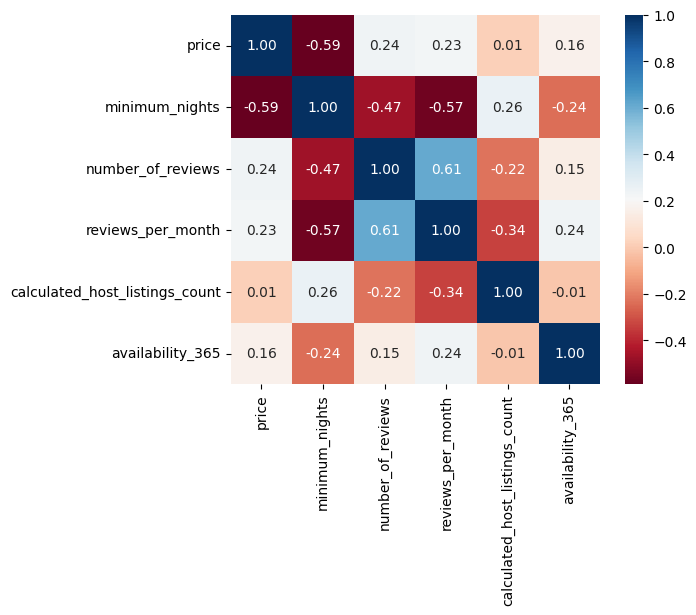

In [28]:
#Super Host
corr_super_host = df_cat_superhost[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr_super_host, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Conclusão: O Desvio da Colaboração

A presente análise dos dados de Barcelona valida a tese acadêmica: a plataforma Airbnb na cidade não é mais um motor de economia colaborativa, mas sim um mercado dominado por um oligopólio de anfitriões profissionais.


Esses operadores profissionais se concentram nas regiões mais caras e turísticas, anunciam majoritariamente imóveis inteiros (reduzindo a moradia para locais), e, no caso dos maiores Super Hosts, demonstram a maior taxa de evasão regulatória (mais de 50% sem licença).


O plano de Barcelona de banir os aluguéis de curta temporada até 2028 é, portanto, uma resposta direta e necessária à forma como a financeirização da moradia alterou a dinâmica social, transformando a habitação em um ativo de investimento turístico em detrimento do direito à moradia local.


### **Referências**



*   https://www.cnnbrasil.com.br/internacional/governo-da-espanha-vai-restringir-aluguel-de-apartamentos-para-turistas/
*   https://www.cnnbrasil.com.br/economia/macroeconomia/airbnb-pede-que-barcelona-reconsidere-repressao-a-alugueis-de-curta-temporada/
*   https://www.cnnbrasil.com.br/internacional/espanha-investiga-airbnb-em-repressao-a-ofertas-de-aluguel-para-turistas/
*   https://ojs.revistadelos.com/ojs/index.php/delos/article/view/5451
*   https://www.researchgate.net/profile/Yure-Lobo/publication/320910962_Economia_colaborativa_e_Airbnb_reflexoes_urbano-turisticas_a_partir_de_Sao_Paulo_e_Rio_de_Janeiro_Sharing_economy_and_Airbnb_urban_and_touristic_reflections_as_from_Sao_Paulo_and_Rio_de_Janeiro/links/5e3cd294a6fdccd9658e150f/Economia-colaborativa-e-Airbnb-reflexoes-urbano-turisticas-a-partir-de-Sao-Paulo-e-Rio-de-Janeiro-Sharing-economy-and-Airbnb-urban-and-touristic-reflections-as-from-Sao-Paulo-and-Rio-de-Janeiro.pdf
*   https://www.teses.usp.br/teses/disponiveis/8/8136/tde-13042021-193918/publico/2020_ClariceNassarBramucciTambelli_VCorr.pdf#page=54.59
*   https://bdta.abcd.usp.br/directbitstream/e3325eb7-3ff7-45c1-ae29-df3feb0b64ee/2021.BarbaraFantazziniOliveiraGoncalves.TGI.pdf#page=25.54
*   https://airbnbvsberlin.com/#introduction
*   https://www.eleconomista.es/vivienda/noticias/7238398/12/15/Colau-multa------a-Airbnb-por-anunciar-pisos-sin-licencia-turistica.html
*   https://www.google.com/url?q=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FYure-Lobo%2Fpublication%2F320910962_Economia_colaborativa_e_Airbnb_reflexoes_urbano-turisticas_a_partir_de_Sao_Paulo_e_Rio_de_Janeiro_Sharing_economy_and_Airbnb_urban_and_touristic_reflections_as_from_Sao_Paulo_and_Rio_de_Janeiro%2Flinks%2F5e3cd294a6fdccd9658e150f%2FEconomia-colaborativa-e-Airbnb-reflexoes-urbano-turisticas-a-partir-de-Sao-Paulo-e-Rio-de-Janeiro-Sharing-economy-and-Airbnb-urban-and-touristic-reflections-as-from-Sao-Paulo-and-Rio-de-Janeiro.pdf


